In [ ]:
# %pip install tensorflow-addons
# %pip uninstall tensorflow-addons
# %pip install tqdm scikit-learn
# %pip install fastparquet pyarrow
# %pip install tensorflow-addons seaborn fastparquet

  Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.7/684.7 kB 7.1 MB/s eta 0:00:00
Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl (12.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit 

import glob
import sys
import os
import math
import gc
import sys
import sklearn
import scipy
import ast
import pyarrow
import fastparquet

# print(f'Tensorflow V{tf.__version__}')
# print(f'Keras V{tf.keras.__version__}')
# print(f'Python V{sys.version}')

# LSTM

In [57]:
from sklearn.model_selection import train_test_split
from keras import utils

In [59]:
words = os.listdir('/Users/theerat/Dataset/train')

In [60]:
words.remove('.DS_Store')
# words.remove('ไม่มี')

In [10]:
all_words = [
    'ฉัน','กิน','พูด','อยู่','หนังสือ','คุณ','ดื่ม','ฟัง','อะไร',
    'โรงเรียน','เขา','นอน','หัวเราะ','บ้าน','ข้าว','นักเรียน',
    'เดิน','ชอบ','ที่ไหน','วันนี้','ไก่ผัดกะเพรา','วิ่ง','ไม่มี','ปลา','ควาย'
             ]

In [61]:
words

['หนังสือ',
 'อยู่',
 'พูด',
 'อะไร',
 'ไก่ผัดกะเพรา',
 'ปลา',
 'ชอบ',
 'หัวเราะ',
 'ควาย',
 'ไม่มี',
 'ฟัง',
 'ดื่ม',
 'คุณ',
 'นอน',
 'เขา',
 'กิน',
 'โรงเรียน',
 'ฉัน',
 'ที่ไหน',
 'ข้าว',
 'บ้าน',
 'นักเรียน',
 'วันนี้',
 'วิ่ง',
 'เดิน']

In [62]:
len(words)

25

In [63]:
words_np = np.array(words)

In [65]:
DATA_PATH = os.path.join('/Users/theerat/Dataset/train')

sequence_length = 30
no_sequences = 30

In [66]:
label_map = {label:num for num, label in enumerate(words_np)}
label_map

{'หนังสือ': 0,
 'อยู่': 1,
 'พูด': 2,
 'อะไร': 3,
 'ไก่ผัดกะเพรา': 4,
 'ปลา': 5,
 'ชอบ': 6,
 'หัวเราะ': 7,
 'ควาย': 8,
 'ไม่มี': 9,
 'ฟัง': 10,
 'ดื่ม': 11,
 'คุณ': 12,
 'นอน': 13,
 'เขา': 14,
 'กิน': 15,
 'โรงเรียน': 16,
 'ฉัน': 17,
 'ที่ไหน': 18,
 'ข้าว': 19,
 'บ้าน': 20,
 'นักเรียน': 21,
 'วันนี้': 22,
 'วิ่ง': 23,
 'เดิน': 24}

อัดไฟล์

In [67]:
filtered_words = np.array(list(filter(lambda word: word != '.DS_Store', label_map)))
filtered_words

array(['หนังสือ', 'อยู่', 'พูด', 'อะไร', 'ไก่ผัดกะเพรา', 'ปลา', 'ชอบ',
       'หัวเราะ', 'ควาย', 'ไม่มี', 'ฟัง', 'ดื่ม', 'คุณ', 'นอน', 'เขา',
       'กิน', 'โรงเรียน', 'ฉัน', 'ที่ไหน', 'ข้าว', 'บ้าน', 'นักเรียน',
       'วันนี้', 'วิ่ง', 'เดิน'], dtype='<U12')

In [ ]:
#use with npy file 
sequences, labels = [], []
for action in words_np:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
#test
csv_path ='/Users/theerat/Documents/tsl/sign-language-translator/Datasets/Landmarked/ควาย/1/0.csv'
df = pd.read_csv(csv_path, skiprows=1)
frame_data = df.to_numpy()

frame_length = frame_data.size

print(f"Frame shape: {frame_data.shape}")
print(f"Frame length (number of features): {frame_length}")
df

In [76]:
import os
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

sequences_train, labels_train = [], []

sequence_length = 30
no_sequences = 20
frame_length = 1404

for action in tqdm(words, desc="Processing Actions"):
    n_sequences = os.listdir(os.path.join(DATA_PATH, action))

    n_sequences = list(filter(lambda seq: seq != '.DS_Store', n_sequences))
    for sequence in tqdm(n_sequences, desc=f"Sequences for {action}", leave=False):
        window = []
        for frame_num in range(sequence_length):
            csv_path = os.path.join(DATA_PATH, action, sequence, f'{frame_num}.csv')
            
            res = pd.read_csv(csv_path, skiprows=1).to_numpy()
    
            res_cleaned = []
            for row in res:
                for val in row:
                    if isinstance(val, str):
                        res_cleaned.extend(ast.literal_eval(val))
                    elif not np.isnan(val):
                        res_cleaned.append(val)
            
            # NaN = 0
            res_cleaned = np.nan_to_num(res_cleaned, nan=0.0)
            if len(res_cleaned) < frame_length:
                res_cleaned = np.pad(res_cleaned, (0, frame_length - len(res_cleaned)), mode='constant', constant_values=0)
            elif len(res_cleaned) > frame_length:
                res_cleaned = res_cleaned[:frame_length]
            
            window.append(res_cleaned)
        
        if len(window) < sequence_length:
            padding_frame = np.zeros((frame_length,))
            for _ in range(sequence_length - len(window)):
                window.append(padding_frame)
        elif len(window) > sequence_length:
            window = window[:sequence_length]
        
        sequences.append(window)
        labels.append(label_map[action])

X = np.array(sequences)
y = np.array(labels)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Processing Actions: 100%|██████████| 25/25 [04:30<00:00, 10.84s/it]


Shape of X: (1940, 30, 1404)
Shape of y: (1940,)


In [79]:
X_train = np.array(sequences)
y_train = utils.to_categorical(labels).astype(int)

In [78]:
import os
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

sequences_test, labels_test = [], []

sequence_length = 30
# no_sequences = 20
frame_length = 1404
DATA_PATH_2 = os.path.join('/Users/theerat/Dataset/test')

for action in tqdm(words, desc="Processing Actions"):
    n_sequences = os.listdir(os.path.join(DATA_PATH_2, action))

    n_sequences = list(filter(lambda seq: seq != '.DS_Store', n_sequences))
    for sequence in tqdm(n_sequences, desc=f"Sequences for {action}", leave=False):
        window = []
        for frame_num in range(sequence_length):
            csv_path = os.path.join(DATA_PATH_2, action, sequence, f'{frame_num}.csv')
            
            res = pd.read_csv(csv_path, skiprows=1).to_numpy()
    
            res_cleaned = []
            for row in res:
                for val in row:
                    if isinstance(val, str):
                        res_cleaned.extend(ast.literal_eval(val))
                    elif not np.isnan(val):
                        res_cleaned.append(val)
            
            # NaN = 0
            res_cleaned = np.nan_to_num(res_cleaned, nan=0.0)
            if len(res_cleaned) < frame_length:
                res_cleaned = np.pad(res_cleaned, (0, frame_length - len(res_cleaned)), mode='constant', constant_values=0)
            elif len(res_cleaned) > frame_length:
                res_cleaned = res_cleaned[:frame_length]
            
            window.append(res_cleaned)
        
        if len(window) < sequence_length:
            padding_frame = np.zeros((frame_length,))
            for _ in range(sequence_length - len(window)):
                window.append(padding_frame)
        elif len(window) > sequence_length:
            window = window[:sequence_length]
        
        sequences_test.append(window)
        labels_test.append(label_map[action])

X_test = np.array(sequences_test)
y_test = utils.to_categorical(labels_test).astype(int)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Processing Actions: 100%|██████████| 25/25 [02:20<00:00,  5.60s/it]

Shape of X: (1940, 30, 1404)
Shape of y: (1940,)


In [80]:
np.save('s_train.npy', X_train)
np.save('l_train.npy', y_train)
np.save('s_test.npy', X_test)
np.save('l_test.npy', y_test)

In [81]:
sequences2, labels2 = np.load('s_train.npy'), np.load('l_train.npy')

In [82]:
df = pd.DataFrame({'sequence':sequences, 'label':labels})
df

,sequence,label
0,"[[0.5058546662330627, 0.3687451481819153, -0.5...",0
1,"[[0.5072938799858093, 0.3691006600856781, -0.6...",0
2,"[[0.5099446773529053, 0.3753768801689148, -0.6...",0
3,"[[0.508685827255249, 0.37606343626976013, -0.6...",0
4,"[[0.5110201239585876, 0.3756888210773468, -0.6...",0
...,...,...
1935,"[[0.5248710513114929, 0.39305877685546875, -0....",24
1936,"[[0.5181424617767334, 0.3898189067840576, -0.5...",24
1937,"[[0.5432792901992798, 0.2515603005886078, -1.5...",24
1938,"[[0.5269699096679688, 0.3915901184082031, -0.5...",24


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((1940, 30, 1404), (259, 30, 1404), (1940, 25), (259, 25))

In [85]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_train_sparse

array([ 0,  0,  0, ..., 24, 24, 24])

__New Model__

In [87]:
from keras import models, layers, callbacks
from keras import callbacks, Model, Input

In [88]:
# include early stopping and reducelr
def get_callbacks():
    return [
        callbacks.EarlyStopping(
            monitor="val_accuracy", patience=10, restore_best_weights=True
        ),
        callbacks.ReduceLROnPlateau(
            monitor="val_accuracy", factor=0.5, patience=3
        ),
    ]


# a single dense block followed by a normalization block and relu activation
def dense_block(units, name):
    fc = layers.Dense(units)
    norm = layers.LayerNormalization()
    act = layers.Activation("relu")
    drop = layers.Dropout(0.1)
    return lambda x: drop(act(norm(fc(x))))


# the lstm block with the final dense block for the classification
def classifier(lstm_units):
    lstm = layers.LSTM(lstm_units)
    out = layers.Dense(25, activation="softmax")
    return lambda x: out(lstm(x))

In [90]:
import tensorflow as tf
from keras import layers, Model, Input, callbacks,optimizers

encoder_units = [512, 256]
lstm_units = 500  

inputs = Input(shape=(30, 1404))

x = inputs
for i, n in enumerate(encoder_units):
    x = dense_block(n, f"encoder_{i}")(x)

out = classifier(lstm_units)(x)

model = Model(inputs=inputs, outputs=out)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
callbacks_list = get_callbacks()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30, 1404)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30, 512)        │       719,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_4           │ (None, 30, 512)        │         1,024 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ (None, 30, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 500)            │     1,514,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │        12,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,378,749 (9.07 MB)

 Trainable params: 2,378,749 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

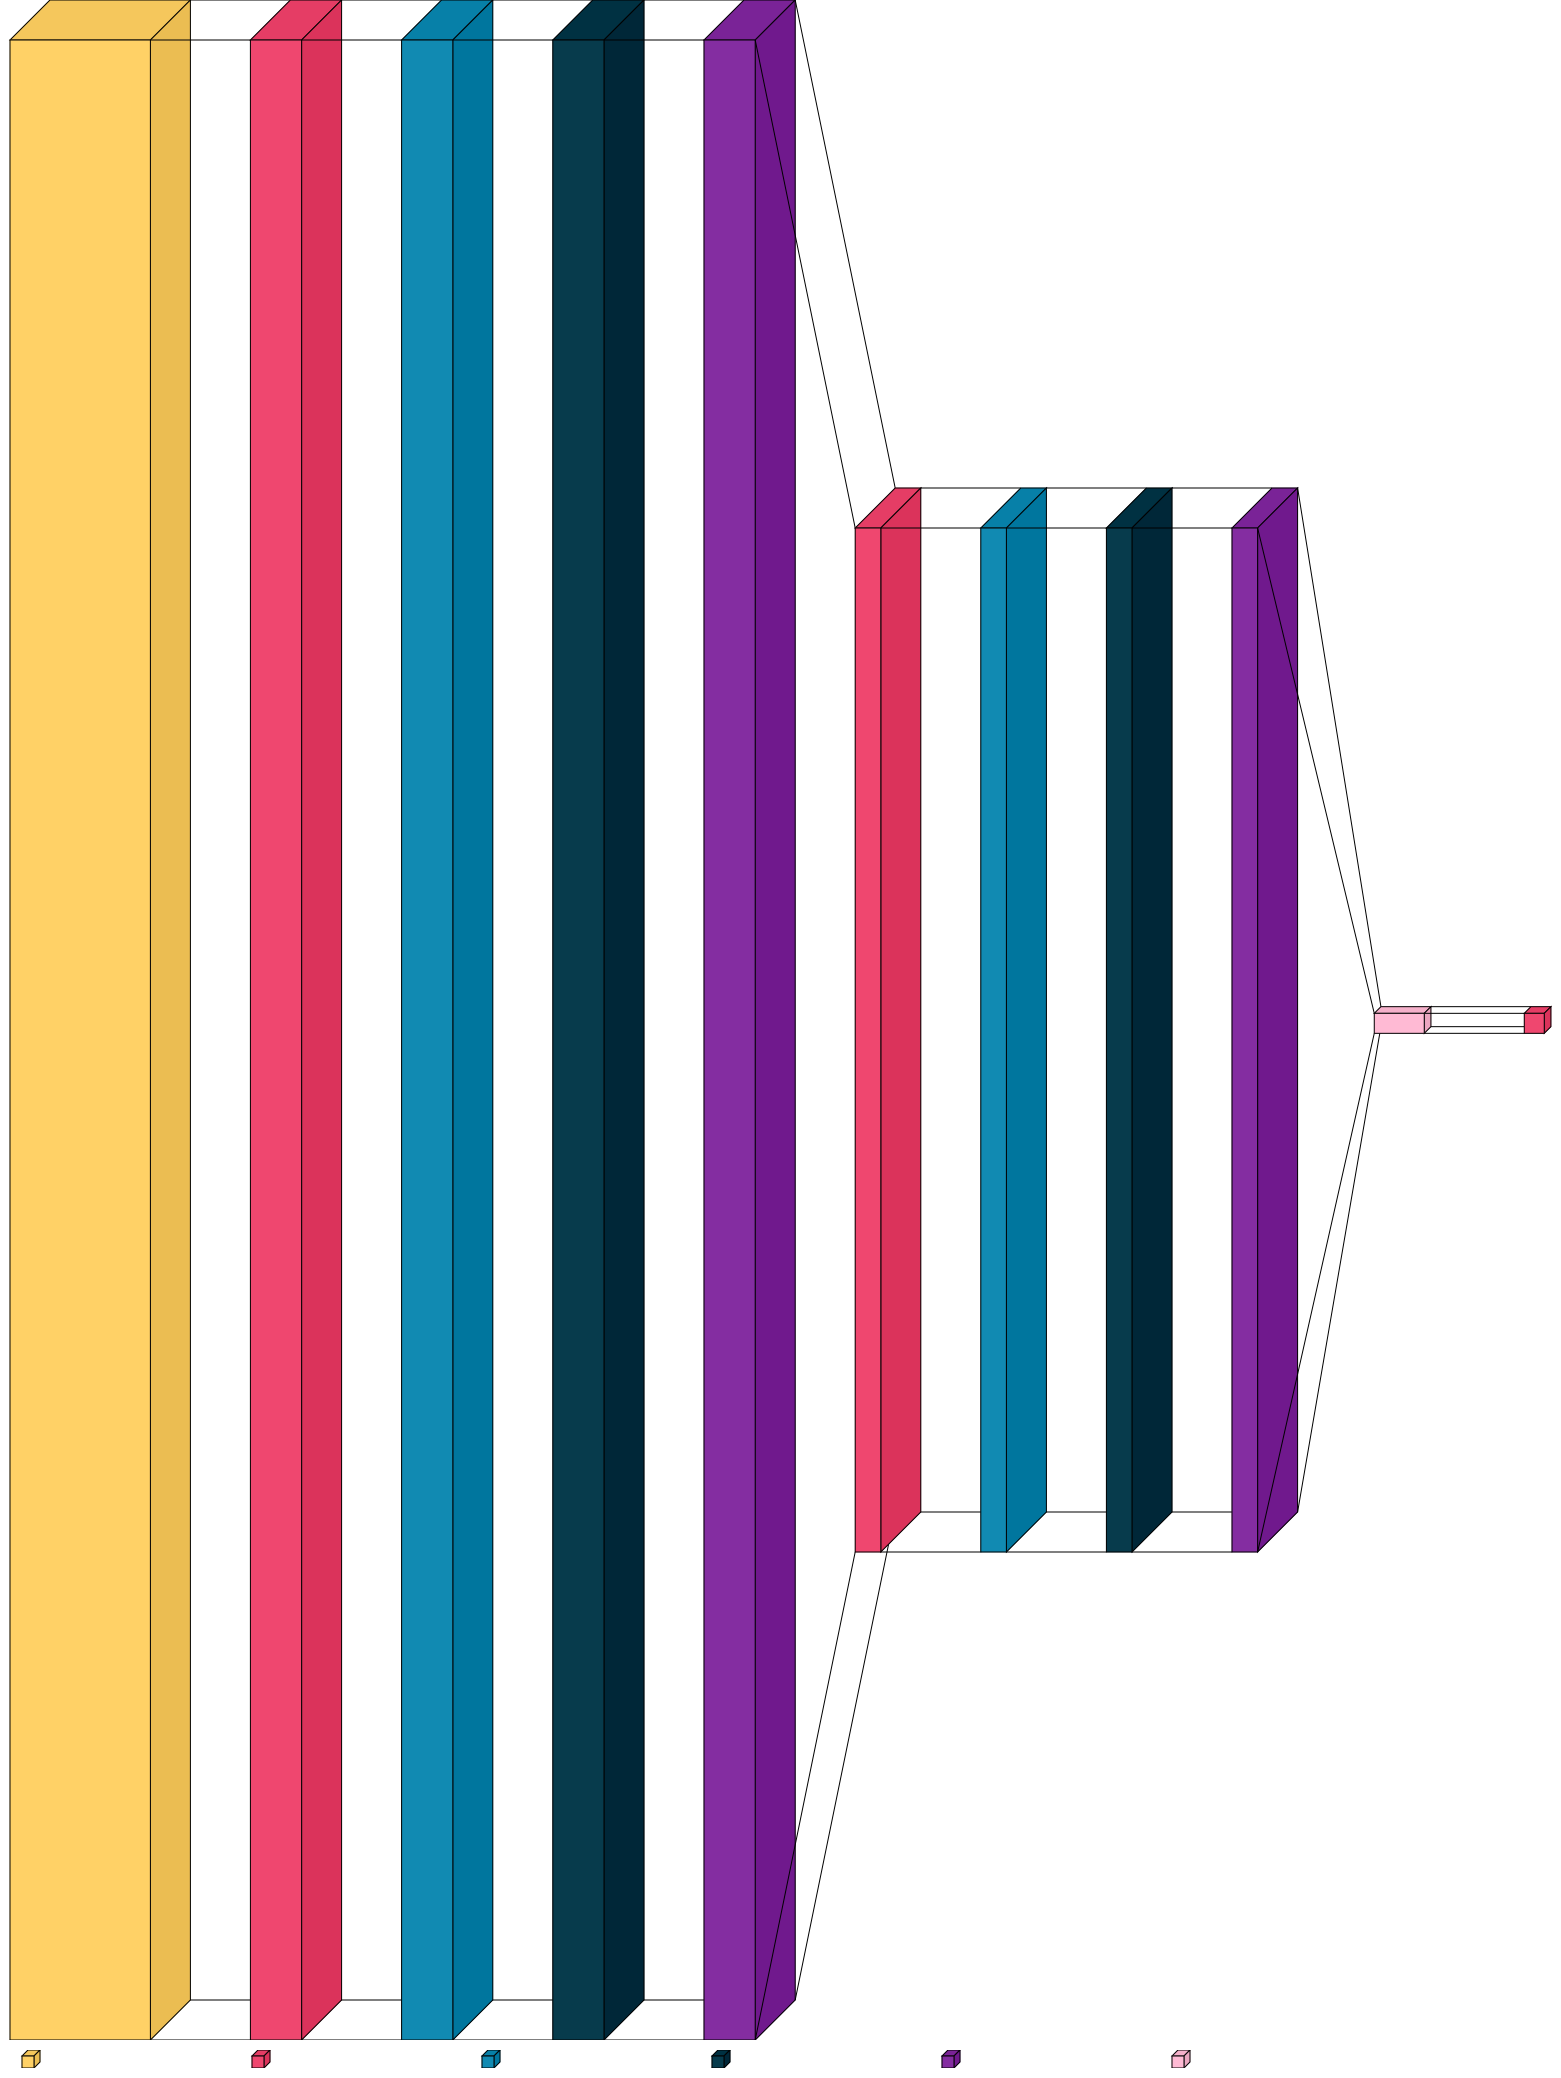

In [58]:
import visualkeras
from PIL import ImageFont
# font = ImageFont.truetype("SukhumvitSet-Medium.ttf", 9)
visualkeras.layered_view(model, legend=True,spacing=100)

In [91]:
history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks_list,
                    verbose=1
                    )

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.1072 - loss: 3.0355 - val_accuracy: 0.3196 - val_loss: 1.7563 - learning_rate: 0.0010
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - accuracy: 0.4417 - loss: 1.5304 - val_accuracy: 0.3969 - val_loss: 1.3146 - learning_rate: 0.0010
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 282ms/step - accuracy: 0.5110 - loss: 1.2411 - val_accuracy: 0.5979 - val_loss: 1.0759 - learning_rate: 0.0010
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.6675 - loss: 0.9063 - val_accuracy: 0.5799 - val_loss: 0.9784 - learning_rate: 0.0010
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - accuracy: 0.7057 - loss: 0.7319 - val_accuracy: 0.4948 - val_loss: 1.3837 - learning_rate: 0.0010
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.6448 - loss: 0.9208 - val_accuracy: 0.5361 - val_loss: 1.0636 - learning_rate: 0.0010
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - accuracy: 0.7501 - l

In [45]:
history = model.fit(
                    X_train,
                    y_train,
                    epochs=180,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1
                    )

Epoch 1/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.0380 - loss: 3.4773 - val_accuracy: 0.0167 - val_loss: 3.2237
Epoch 2/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.1125 - loss: 2.9988 - val_accuracy: 0.1500 - val_loss: 2.5614
Epoch 3/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.2298 - loss: 2.2898 - val_accuracy: 0.2750 - val_loss: 1.8654
Epoch 4/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.3034 - loss: 1.9575 - val_accuracy: 0.3000 - val_loss: 1.6400
Epoch 5/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.3504 - loss: 1.6448 - val_accuracy: 0.4667 - val_loss: 1.2230
Epoch 6/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.4290 - loss: 1.3807 - val_accuracy: 0.4333 - val_loss: 1.3254
Epoch 7/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.4506 - loss: 1.3364 - val_accuracy: 0.4333 - val_loss: 1.3211
Epoch 8/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.4468 - loss: 1.3390 - val_accu

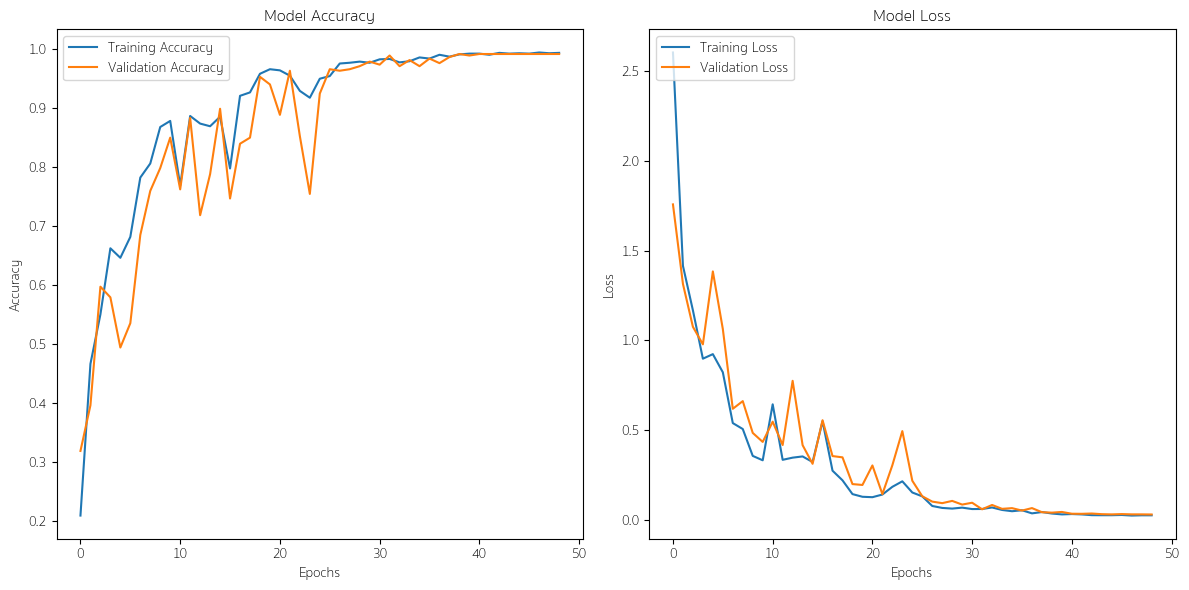

In [92]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


In [93]:
model.save('model_25_2.h5')
model.save_weights('weights_25_2.weights.h5')

In [94]:
labels_predict = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [95]:
# Decoding
labels_predict = np.argmax(labels_predict , axis=1)
labels_test_normal = np.argmax(y_test , axis=1)

In [96]:
labels_test_normal.shape , labels_predict.shape

((259,), (259,))

In [97]:
labels_predict

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, 19,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21,
       21, 21, 21, 21, 21

In [98]:
#Accuracy Score
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9884169884169884


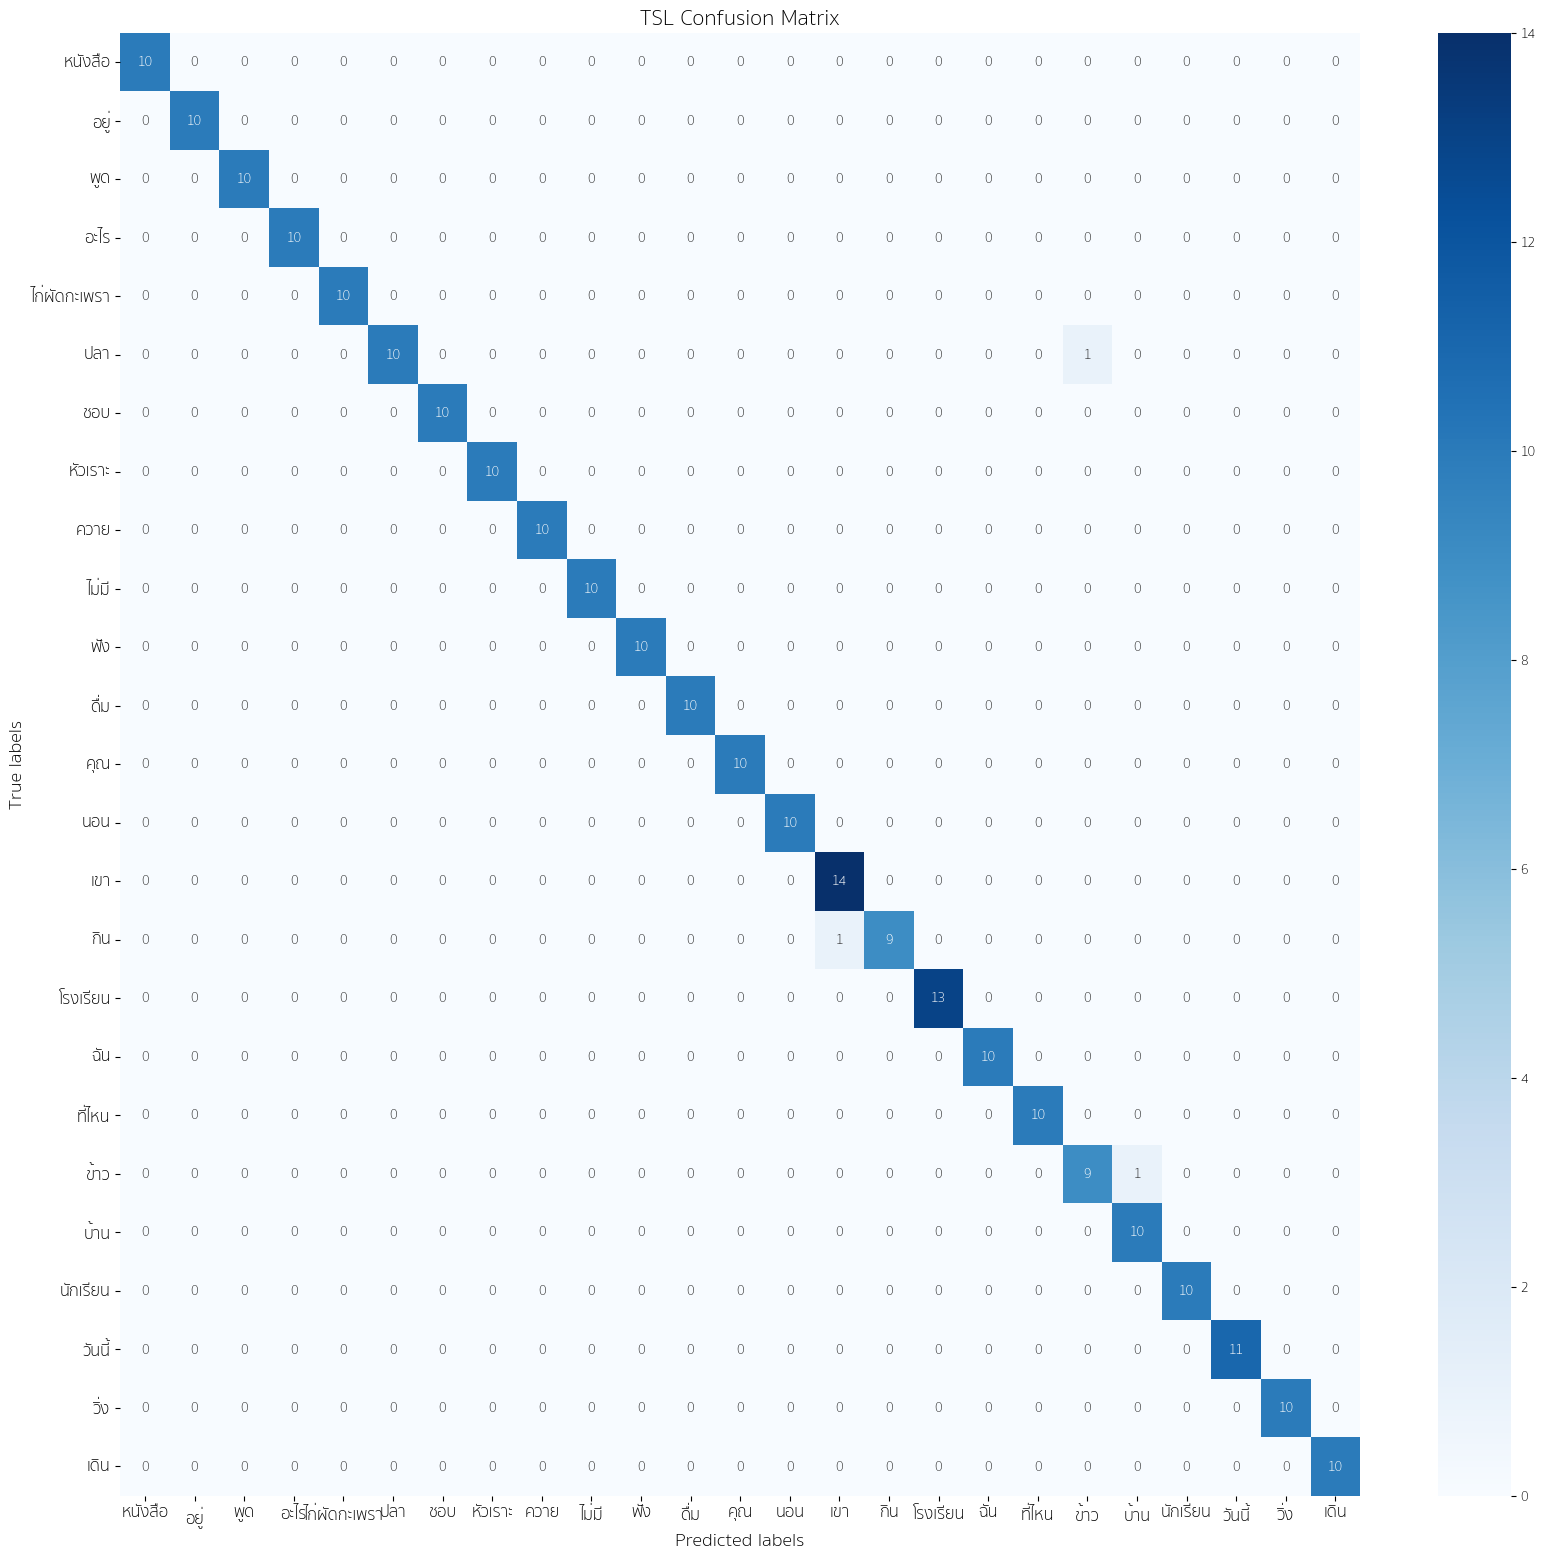

In [99]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

# ตั้งค่า Thai Font (ตัวอย่างใช้ฟอนต์ TH Sarabun New)
thai_font_path = "/Users/theerat/Documents/tsl/sign-language-translator/Datasets/SukhumvitSet-Medium.ttf"  # หรือพาธที่ตรงกับระบบของคุณ
font_prop = matplotlib.font_manager.FontProperties(fname=thai_font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

class_labels = words


cm = confusion_matrix(labels_test_normal, labels_predict)

fig, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('TSL Confusion Matrix', fontsize=16)

ax.set_xticklabels(class_labels, rotation=0, fontsize=12)
ax.set_yticklabels(class_labels, rotation=0, fontsize=12)

plt.show()


In [100]:
print(cm)

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10

In [101]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(labels_test_normal,labels_predict)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       0.93      1.00      0.97        14
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.00        1

In [51]:
label_map

{'หนังสือ': 0,
 'อยู่': 1,
 'พูด': 2,
 'ไก่ผัดกะเพรา': 3,
 'ชอบ': 4,
 'หัวเราะ': 5,
 'ควาย': 6,
 'ฟัง': 7,
 'ดื่ม': 8,
 'คุณ': 9,
 'นอน': 10,
 'เขา': 11,
 'กิน': 12,
 'โรงเรียน': 13,
 'ฉัน': 14,
 'นักเรียน': 15,
 'วิ่ง': 16,
 'เดิน': 17}

In [ ]:
#คำที่มีปัญหา
error_words = ['หัวเราะ','นอน','โรงเรียน','ฉัน']

In [70]:
len(cm)

19

# __Test__

In [235]:
from scipy import stats
import cv2

# __Transformer__

In [3]:
# MatplotLib Global Settings
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24

In [4]:
# If True, processing data from scratch
# If False, loads preprocessed data
PREPROCESS_DATA = False
TRAIN_MODEL = True
# True: use 10% of participants as validation set
# False: use all data for training -> gives better LB result
USE_VAL = False

N_ROWS = 543
N_DIMS = 3
DIM_NAMES = ['x', 'y', 'z']
SEED = 42
NUM_CLASSES = 100
IS_INTERACTIVE = True
VERBOSE = 1 if IS_INTERACTIVE else 2

INPUT_SIZE = 64

BATCH_ALL_SIGNS_N = 4
BATCH_SIZE = 32
N_EPOCHS = 100
LR_MAX = 1e-3
N_WARMUP_EPOCHS = 0
WD_RATIO = 0.05
MASK_VAL = 4237

In [5]:
def print_shape_dtype(l, names):
    for e, n in zip(l, names):
        print(f'{n} shape: {e.shape}, dtype: {e.dtype}')

In [12]:
#for csv file
import os
import pandas as pd

folder_path = '/Users/theerat/Downloads/บ้าน-2'
data = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('_')[1].split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                participant_id = 70
                sign = 'บ้าน'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })

# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')

# บันทึกเป็นไฟล์ CSV
df.to_csv('output.csv', index=False)


In [23]:
import os
import numpy as np
import pandas as pd

folder_path = '/Users/theerat/Downloads/MP_DATA3/คุย'
data = []
participant_id = 0

# อ่านโฟลเดอร์ทั้งหมดภายใน
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        # อ่านไฟล์ .npy ภายในแต่ละโฟลเดอร์
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                sign = 'ก'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })
                participant_id += 1


# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')
# บันทึกเป็นไฟล์ CSV
df.to_csv('outputnpy.csv', index=False)


In [24]:
pd.read_csv('outputnpy.csv')

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/คุย/17/0.npy,76,0,ก
1,/Users/theerat/Downloads/MP_DATA3/คุย/15/0.npy,166,0,ก
2,/Users/theerat/Downloads/MP_DATA3/คุย/3/0.npy,196,0,ก
3,/Users/theerat/Downloads/MP_DATA3/คุย/4/0.npy,136,0,ก
4,/Users/theerat/Downloads/MP_DATA3/คุย/2/0.npy,226,0,ก
...,...,...,...,...
235,/Users/theerat/Downloads/MP_DATA3/คุย/4/29.npy,140,29,ก
236,/Users/theerat/Downloads/MP_DATA3/คุย/29/29.npy,50,29,ก
237,/Users/theerat/Downloads/MP_DATA3/คุย/3/29.npy,200,29,ก
238,/Users/theerat/Downloads/MP_DATA3/คุย/15/29.npy,170,29,ก


In [6]:
word_list = { "สวัสดี": 0,
 "ตก": 1,
 "รอ": 2,
 "กลับ": 3,
 "ขอบคุณ": 4,
 "ตัด": 5,
 "ลง": 6,
 "ขึ้น": 7,
 "เฝ้า": 8,
 "คุย": 9,
 "ช่วย": 10,
 "เชื่อ": 11,
 "ฟัง": 12,
 "มอง": 13,
 "พา": 14,
 "ชวน หลีกภัย": 15,
 "ทักษิณ ชินวัตร": 16,
 "ขนม": 17,
 "พิธา ลิ้มเจริญรัตน์": 18,
 "ศิริกัญญา ตันสกุล": 19,
 "แบก": 20,
 "อนุทิน ชาญวีรกูล": 21,
 "รังสิมันต์ โรม": 22,
 "พีระพันธุ์ สาลีรัฐวิภาค": 23,
 "คุณหญิงสุดารัตน์ เกยุราพันธุ์": 24,
 "พลเอกอนุพงษ์ เผ่าจินดา": 25,
 "สุวัจน์ ลิปตพัลลภ": 26,
 "กรณ์ จาติกวณิช": 27,
 "วราวุธ ศิลปะอาชา": 28,
 "พล.ต.อ.เสรีพิศุทธ์ เตมียเวสวราวุธ ศิลปะอาชา": 29,
 "ศักดิ์สยาม ชิดชอบ": 30,
 "ชาดา ไทยเศรษฐ์": 31,
 "สุชัชวีร์ สุวรรณสวัสดิ์": 32,
 "จุรินทร์ ลักษณวิศิษฏ์": 33,
 "ไตรรงค์ สุวรรณคีรี": 34,
 "พลเอกประยุทธ์ จันทร์โอชา": 35,
 "นฤมล ภิญโญสินวัฒน์": 36,
 "ธรรมนัส พรหมเผ่า": 37,
 "ชัยวุฒิ ธนาคมานุสรณ์": 38,
 "ไพบูลย์ นิติตะวัน": 39,
 "พลเอกประวิตร วงษ์สุวรรณ": 40,
 "พริษฐ์ วัชรสินธุ": 41,
 "ยิ่งลักษณ์ ชินวัตร": 42,
 "ณัฐวุฒิ ใสยเกื้อ": 43,
 "นพ.ชลน่าน ศรีแก้ว": 44,
 "เศรษฐา ทวีสิน": 45,
 "แพทองธาร ชินวัตร": 46,
 "อะไร": 47,
 "สมัคร": 48,
 "กระโดด": 49,
 "ยก": 50,
 "ชน": 51,
 "ผ่าน": 52,
 "แนะนำ": 53,
 "จำได้": 54,
 "ปลูก": 55,
 "รวม": 56,
 "ทำหาย": 57,
 "เจอ": 58,
 "หาย": 59,
 "พนักงานขาย": 60,
 "นักเขียนโปรแกรม": 61,
 "พ่อครัว": 62,
 "เจ้าหน้าที่ตำรวจ": 63,
 "เนื้อลูกแกะ": 64,
 "เนื้อหมู": 65,
 "คุณสบายดีไหม": 66,
 "ดูเหมือน": 67,
 "วาง": 68,
 "อยู่": 69,
 "ก": 70,
 "ข": 71,
 "ค": 72,
 "ฆ": 73,
 "ต": 74,
 "ถ": 75,
 "ง": 76,
 "จ": 77,
 "ฉ": 78,
 "ช": 79,
 "ซ": 80,
 "ฏ": 81,
 "ฐ": 82,
 "ฑ": 83,
 "ฒ": 84,
 "ณ": 85,
 "ด": 86,
 "ท": 87,
 "ธ": 88,
 "น": 89,
 "บ": 90,
 "ป": 91,
 "ผ": 92,
 "ฝ": 93,
 "พ": 94,
 "ฟ": 95,
 "ภ": 96,
 "ม": 97,
 "ย": 98,
 "ร": 99,
 "ล": 100,
 "ว": 101,
 "ศ": 102,
 "ษ": 103,
 "ส": 104,
 "ห": 105,
 "ฬ": 106,
 "อ": 107,
 "ฮ": 108,
 "ญ": 109,
 "ฎ": 110
}


In [ ]:

# กำหนด path ของโฟลเดอร์ที่ต้องการอ่าน
base_path = '/Users/theerat/Downloads/MP_DATA3'
# สร้างลิสต์เพื่อเก็บข้อมูล
data = []


# อ่านข้อมูลจากโฟลเดอร์และไฟล์
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    print(folder_path)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for i in range(30):  # อ่านไฟล์จาก 0 ถึง 29
                file_path = os.path.join(subfolder_path, f"{i}.npy")
                try:
                    # โหลดข้อมูลจากไฟล์ .npy
                    data_array = np.load(file_path)
                    sign = os.path.basename(folder_path)  # ชื่อโฟลเดอร์เป็น sign
                    for sequence_id, value in enumerate(data_array):
                        # เพิ่มข้อมูลลงในลิสต์
                        data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': sequence_id,
                            'sign': sign
                        })
                except FileNotFoundError:
                    # ข้ามไฟล์ที่ไม่พบ
                    pass

# สร้าง DataFrame จากลิสต์ข้อมูล
df = pd.DataFrame(data)
df.to_csv('outputnpy.csv', index=False)
# แสดงข้อมูล
print(df)


/Users/theerat/Downloads/MP_DATA3/สวัสดี
/Users/theerat/Downloads/MP_DATA3/ตก
/Users/theerat/Downloads/MP_DATA3/รอ
/Users/theerat/Downloads/MP_DATA3/กลับ
/Users/theerat/Downloads/MP_DATA3/ขอบคุณ
/Users/theerat/Downloads/MP_DATA3/ตัด
/Users/theerat/Downloads/MP_DATA3/ลง
/Users/theerat/Downloads/MP_DATA3/ขึ้น
/Users/theerat/Downloads/MP_DATA3/เฝ้า
/Users/theerat/Downloads/MP_DATA3/คุย
/Users/theerat/Downloads/MP_DATA3/ช่วย
/Users/theerat/Downloads/MP_DATA3/เชื่อ
/Users/theerat/Downloads/MP_DATA3/ฟัง
/Users/theerat/Downloads/MP_DATA3/มอง
/Users/theerat/Downloads/MP_DATA3/พา
/Users/theerat/Downloads/MP_DATA3/ชวน หลีกภัย
/Users/theerat/Downloads/MP_DATA3/ทักษิณ ชินวัตร
/Users/theerat/Downloads/MP_DATA3/ขนม
/Users/theerat/Downloads/MP_DATA3/พิธา ลิ้มเจริญรัตน์
/Users/theerat/Downloads/MP_DATA3/ศิริกัญญา ตันสกุล
/Users/theerat/Downloads/MP_DATA3/แบก
/Users/theerat/Downloads/MP_DATA3/อนุทิน ชาญวีรกูล
/Users/theerat/Downloads/MP_DATA3/รังสิมันต์ โรม
/Users/theerat/Downloads/MP_DATA3/พีระพันธุ์ 

In [35]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for i in os.listdir(subfolder_path):
            if i == '.DS_Store':
                continue
            npy_path = os.path.join(subfolder_path, i)
            sequence_id = os.path.splitext(i)[0]
            data.append({
                'path': npy_path,
                'participant_id': participant_id,
                'sequence_id': sequence_id,
                'sign': sign
            })
            
            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20...,0,20,สวัสดี
1,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/21...,0,21,สวัสดี
2,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/23...,0,23,สวัสดี
3,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/22...,0,22,สวัสดี
4,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/26...,0,26,สวัสดี
...,...,...,...,...
36414,/Users/theerat/Downloads/MP_DATA3/ฎ/25/17.npy,110,17,ฎ
36415,/Users/theerat/Downloads/MP_DATA3/ฎ/25/13.npy,110,13,ฎ
36416,/Users/theerat/Downloads/MP_DATA3/ฎ/25/12.npy,110,12,ฎ
36417,/Users/theerat/Downloads/MP_DATA3/ฎ/25/10.npy,110,10,ฎ


In [37]:
new_df = pd.read_csv('train.csv')

In [42]:
df = new_df.sort_values(by=['sequence_id']).reset_index(drop=False)
df

,index,path,participant_id,sequence_id,sign
0,2389,สวัสดี\22.parquet,22,0,สวัสดี
1,2377,สวัสดี\1.parquet,1,0,สวัสดี
2,2378,สวัสดี\10.parquet,10,0,สวัสดี
3,2379,สวัสดี\11.parquet,11,0,สวัสดี
4,2380,สวัสดี\12.parquet,12,0,สวัสดี
...,...,...,...,...,...
2992,723,ฎ\4.parquet,4,110,ฎ
2993,724,ฎ\5.parquet,5,110,ฎ
2994,725,ฎ\6.parquet,6,110,ฎ
2995,727,ฎ\8.parquet,8,110,ฎ


In [49]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy') and filename != '.DS_Store':
                file_path = os.path.join(subfolder_path, filename)
                try:
                    np_data = np.load(file_path)
                except Exception as e :
                    print('Error')
                    continue
                for seq_id, value in enumerate(np_data):
                    data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': seq_id,
                            'sign': sign
                        })
                    
            #อ่านค่า npy แต่ละไฟล์ละนำมาเก็บเป็น parquet file ตามแต่ละ subfolder
        

            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

KeyboardInterrupt: 

In [64]:
def create_landmark_rows(landmarks, frame, index, type_label):
    for landmark_index, (x, y, z) in enumerate(landmarks):
        new_row = {
            'frame': frame,
            'row_id': f'{folder_name}-{index}',
            'type': type_label,
            'landmark_index': landmark_index,
            'x': x,
            'y': y,
            'z': z
        }
    yield new_row

In [75]:
import os
import pandas as pd
import ast

base_path = '/Users/theerat/Downloads/MP_DATA3/สวัสดี'
output_path = 'outputnpy.parqute'

combined_df = pd.DataFrame()

for folder in os.listdir(base_path):
    if folder != '.DS_Store':
        folder_path = os.path.join(base_path, folder)
        
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            file_path = os.path.join(folder_path, file)
            print(file_path)
            
            try:
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
                
                print("Columns:", df.columns)
                print("First rows:\n", df.head())

                # Strip whitespace from column names
                df.columns = df.columns.str.strip()

                new_rows = []  # List to hold new rows
                
                for index, row in df.iterrows():
                    body_landmarks = ast.literal_eval(row['Body'])
                    right_landmarks = ast.literal_eval(row['Right'])
                    left_landmarks = ast.literal_eval(row['Left'])

                    new_rows.extend(create_landmark_rows(body_landmarks, i, index, 'body'))
                    new_rows.extend(create_landmark_rows(right_landmarks, i, index, 'right'))
                    new_rows.extend(create_landmark_rows(left_landmarks, i, index, 'left'))

                # Append the new rows to combined_df
                combined_df = pd.concat([combined_df, pd.DataFrame(new_rows)], ignore_index=True)
            
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Save combined_df to the output path if needed
combined_df.to_parquet(output_path)

print("Processing completed. Final folder processed:", folder)


/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20.npy
Columns: Index(['NUMPY', ' 'fortran_order': False', ' 'shape': (1662', ')',
       ' }                                                         '],
      dtype='object')
First rows:
   NUMPY  'fortran_order': False  'shape': (1662   )  \
0     NaN                     NaN             NaN NaN   
1      ß?                     Qö?             NaN NaN   
2       ?                     ~Ô?             NaN NaN   
3      Ø?                     NaN             NaN NaN   
4      Ð?                     Út¿             NaN NaN   

    }                                                           
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            
Error processing file /Users/the

In [82]:
df = pd.read_parquet('outputnpy.parquet')

FileNotFoundError: [Errno 2] No such file or directory: 'outputnpy.parquet'